In [2]:
import numpy as np
import pandas as pd

In [3]:
import os 
for filenames in os.walk('/Users/coolthick/opt/anaconda3/lib/python3.9/posixpath.py'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [9]:
covid = pd.read_csv('../datasets/COVID-19 Coronavirus.csv')
covid.head()
covid.columns.tolist()

['Country',
 'Other names',
 'ISO 3166-1 alpha-3 CODE',
 'Population',
 'Continent',
 'Total Cases',
 'Total Deaths',
 'Tot\xa0Cases//1M pop',
 'Tot\xa0Deaths/1M pop',
 'Death percentage']

In [11]:
covid.columns = covid.columns.str.replace('//','_').str.replace('/','_').str.replace(' ','_').str.replace('\xa0','_')

covid.columns.tolist()

['Country',
 'Other_names',
 'ISO_3166-1_alpha-3_CODE',
 'Population',
 'Continent',
 'Total_Cases',
 'Total_Deaths',
 'Tot_Cases_1M_pop',
 'Tot_Deaths_1M_pop',
 'Death_percentage']

In [16]:
cases_by_continent = covid.groupby(['Continent'])['Total_Cases'].sum()

In [26]:
cases_by_continent

Continent
Africa                              11764207
Asia                               140957179
Europe                             180332483
Latin America and the Caribbean     67509231
Northern America                    85364770
Oceania                              5647957
Name: Total_Cases, dtype: int64

In [23]:
deaths_by_continent = covid.groupby(['Continent'])['Total_Deaths'].sum()

In [24]:
deaths_by_continent

Continent
Africa                              252873
Asia                               1405003
Europe                             1775727
Latin America and the Caribbean    1686828
Northern America                   1046062
Oceania                               9336
Name: Total_Deaths, dtype: int64

/Users/coolthick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Cases', ylabel='Total_Deaths'>

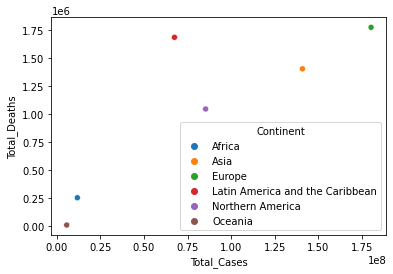

In [28]:
sns.scatterplot(cases_by_continent, deaths_by_continent, hue=cases_by_continent.index)

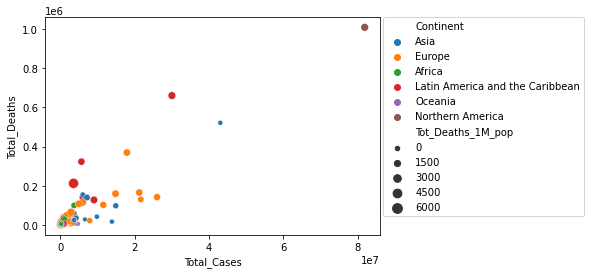

In [44]:
sns.scatterplot(x=covid['Total_Cases'], y=covid['Total_Deaths'], 
                size=covid['Tot_Deaths_1M_pop'], 
                hue=covid['Continent'], sizes=(20,100))

plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

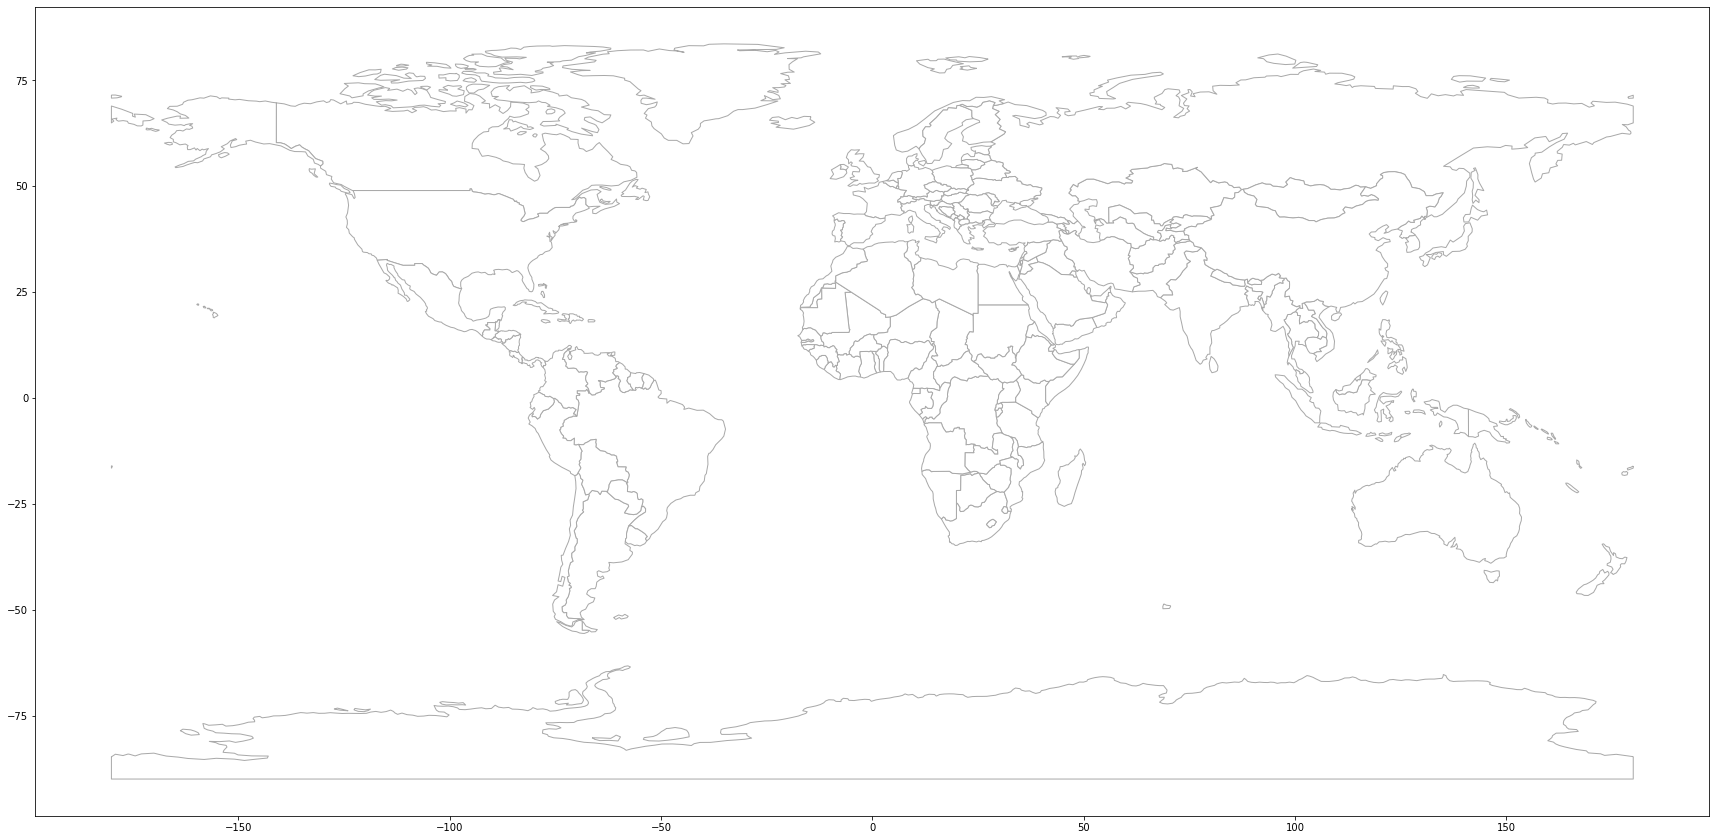

In [46]:
import geopandas as gpd 
map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
map.plot(figsize=(30,30), color='white', edgecolor='darkgrey')
final = map.merge(covid,left_on='name', right_on='Country')

<AxesSubplot:>

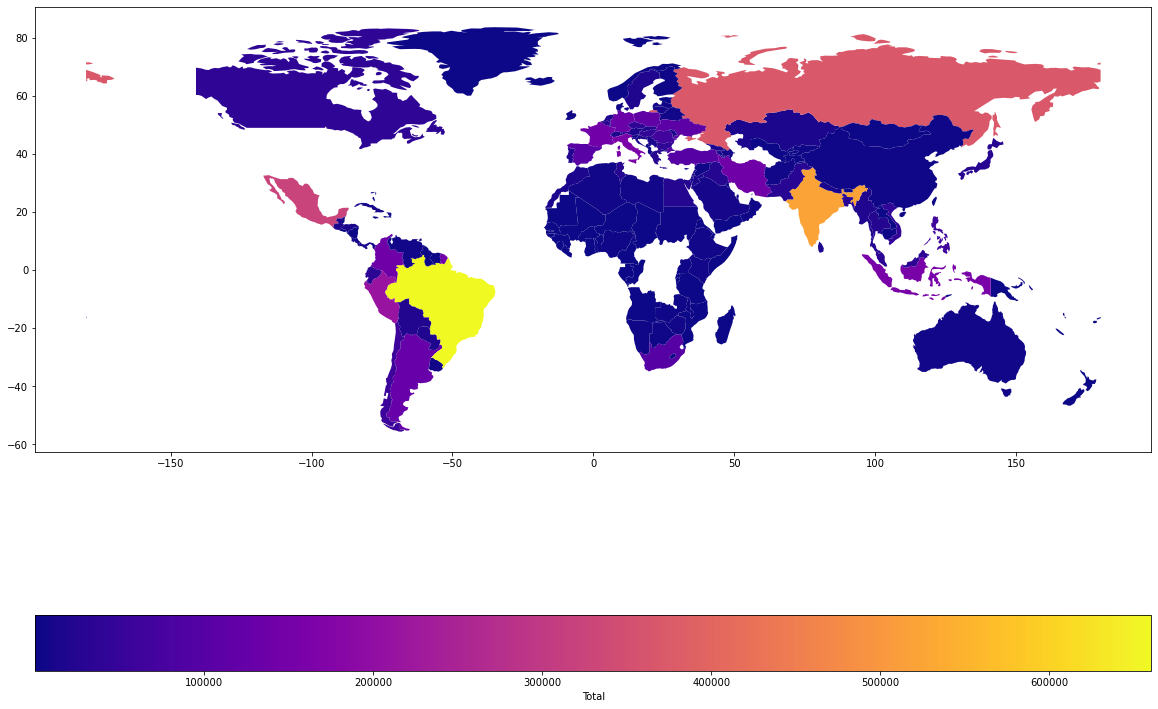

In [47]:
final.plot('Total_Deaths', figsize=(20,20), legend=True,
           legend_kwds={'label':'Total', 'orientation':'horizontal'},
           missing_kwds={'color':'black'}, cmap='plasma')